<h3>Generate a graph<h3>

In [4]:
#Library for visualize a graph
import networkx as nx
import matplotlib.pyplot as plt
import math

In [5]:
#My graph class with the gather of nodes and edges
class Graph:
    nodes = []
    edges = []
    
    def add_node(self, node):
        self.nodes.append(node)
        
    def add_edge(self, edge):
        self.edges.append(edge)
        
    def display(self):
        G = nx.Graph()
        G.add_nodes_from(self.nodes)
        G.add_edges_from(self.edges)
        nx.draw(G, with_labels=True, font_weight='bold')
    
    def adj(self, node):
        adjust = set()
        for iterate in self.edges:
            if iterate[0] == node:
                adjust.add(iterate[1])
            if iterate[1] == node:
                adjust.add(iterate[0])
        return adjust
    
    def cost(self, node1, node2):
        for iterate in self.edges:
            if iterate[0] == node1 and iterate[1] == node2:
                return iterate[2]['weight']
            if iterate[0] == node2 and iterate[1] == node1:
                return iterate[2]['weight']
        return math.inf

<h4>Make the Romania graph<h4>

In [6]:
city = Graph()
city.add_node((0, {'name' : 'Arad'}))
city.add_node((1, {'name' : 'Zerind'}))
city.add_node((2, {'name' : 'Oradea'}))
city.add_node((3, {'name' : 'Sibiu'}))
city.add_node((4, {'name' : 'Timisoara'}))
city.add_node((5, {'name' : 'Lugoj'}))
city.add_node((6, {'name' : 'Mehadia'}))
city.add_node((7, {'name' : 'Dobreta'}))
city.add_node((8, {'name' : 'Rimnicu Vilcea'}))
city.add_node((9, {'name' : 'Fagaras'}))
city.add_node((10, {'name' : 'Pitesti'}))
city.add_node((11, {'name' : 'Bucharest'}))
city.add_node((12, {'name' : 'Giurgiu'}))
city.add_node((13, {'name' : 'Urziceni'}))
city.add_node((14, {'name' : 'Hirsova'}))
city.add_node((15, {'name' : 'Eforie'}))
city.add_node((16, {'name' : 'Vaslui'}))
city.add_node((17, {'name' : 'Lasi'}))
city.add_node((18, {'name' : 'Neamt'}))
city.add_node((19, {'name' : 'Craiova'}))

city.add_edge((0, 1, {'weight' : 75}))
city.add_edge((1, 2, {'weight' : 71}))
city.add_edge((2, 3, {'weight' : 151}))
city.add_edge((0, 3, {'weight' : 140}))
city.add_edge((0, 4, {'weight' : 118}))
city.add_edge((4, 5, {'weight' : 111}))
city.add_edge((5, 6, {'weight' : 70}))
city.add_edge((6, 7, {'weight' : 75}))
city.add_edge((7, 19, {'weight' : 120}))
city.add_edge((3, 8, {'weight' : 80}))
city.add_edge((3, 9, {'weight' : 99}))
city.add_edge((8, 19, {'weight' : 146}))
city.add_edge((8, 10, {'weight' : 97}))
city.add_edge((10, 19, {'weight' : 138}))
city.add_edge((9, 11, {'weight' : 211}))
city.add_edge((11, 12, {'weight' : 90}))
city.add_edge((11, 13, {'weight' : 85}))
city.add_edge((13, 14, {'weight' : 98}))
city.add_edge((14, 15, {'weight' : 86}))
city.add_edge((13, 16, {'weight' : 142}))
city.add_edge((16, 17, {'weight' : 92}))
city.add_edge((17, 18, {'weight' : 87}))
city.add_edge((10, 11, {'weight' : 101}))

In [7]:
city.edges

[(0, 1, {'weight': 75}),
 (1, 2, {'weight': 71}),
 (2, 3, {'weight': 151}),
 (0, 3, {'weight': 140}),
 (0, 4, {'weight': 118}),
 (4, 5, {'weight': 111}),
 (5, 6, {'weight': 70}),
 (6, 7, {'weight': 75}),
 (7, 19, {'weight': 120}),
 (3, 8, {'weight': 80}),
 (3, 9, {'weight': 99}),
 (8, 19, {'weight': 146}),
 (8, 10, {'weight': 97}),
 (10, 19, {'weight': 138}),
 (9, 11, {'weight': 211}),
 (11, 12, {'weight': 90}),
 (11, 13, {'weight': 85}),
 (13, 14, {'weight': 98}),
 (14, 15, {'weight': 86}),
 (13, 16, {'weight': 142}),
 (16, 17, {'weight': 92}),
 (17, 18, {'weight': 87}),
 (10, 11, {'weight': 101})]

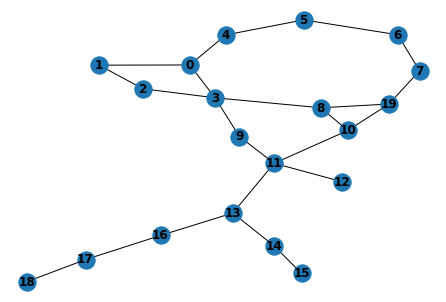

In [8]:
city.display()

<h4>Breath first search<h4>

In [9]:
class Queue:    
    def __init__(self):
        self.data = []
    
    def enqueue(self, node):
        self.data.append(node)
        
    def dequeue(self):
        if len(self.data) == 0:
            return None
        return self.data.pop(0)
    
    def isempty(self):
        return len(self.data) == 0
    
class BFS:
    def __init__(self, problem):
        self.problem = problem
    
    def search(self, source, destination):
        visited = [False] * len(self.problem.nodes)
        path = {source : None}
        fringe = Queue()

        visited[source] = True
        fringe.enqueue(source)
        
        while not fringe.isempty():
            current = fringe.dequeue()
            if current == destination:
                return ('search complete!', path)
            
            for iterate in [element for element in self.problem.adj(current) if visited[element] == False]:
                visited[iterate] = True
                fringe.enqueue(iterate)
                path[iterate] = current
        return ('Not found', path)
    
    def find_path(self, source, destination):
        status, path = self.search(source, destination)
        driven = []
        
        def display_path(node):
            driven.append(node)
            if path[node] == None:
                return 
            display_path(path[node])
            
        if status == 'Not found':
            print(status)
            return None
        else:
            print(status)
            display_path(destination)
            print(driven[-1::-1])
   

In [10]:
#Apply BFS algorithm for the Romania road
solution1 = BFS(city)
solution1.find_path(2, 16)  
solution1.find_path(5, 1)
solution1.find_path(0, 18)


search complete!
[2, 3, 9, 11, 13, 16]
search complete!
[5, 4, 0, 1]
search complete!
[0, 3, 9, 11, 13, 16, 17, 18]


<h4>Depth first search<h4>

In [11]:
class Stack:
    def __init__(self):
        self.data = []
    
    def push(self, node):
        self.data.append(node)
        
    def pop(self):
        if len(self.data) == 0:
            return None
        return self.data.pop(-1)
    
    def isempty(self):
        return len(self.data) == 0

class DFS:
    def __init__(self, problem):
        self.problem = problem
    
    def search(self, source, destination):
        visited = [False] * len(self.problem.nodes)
        path = {source : None}
        fringe = Stack()

        visited[source] = True
        fringe.push(source)
        
        while not fringe.isempty():
            current = fringe.pop()
            if current == destination:
                return ('search complete!', path)
            
            for iterate in [element for element in self.problem.adj(current) if visited[element] == False]:
                visited[iterate] = True
                fringe.push(iterate)
                path[iterate] = current
        return ('Not found', path)
    
    def find_path(self, source, destination):
        status, path = self.search(source, destination)
        driven = []
        
        def display_path(node):
            driven.append(node)
            if path[node] == None:
                return 
            display_path(path[node])
            
        if status == 'Not found':
            print(status)
            return None
        else:
            print(status)
            display_path(destination)
            print(driven[-1::-1])

In [12]:
#Apply DFS algorithm for the Romania road
solution = DFS(city)
solution.find_path(2, 16)  
solution.find_path(5, 1)
solution.find_path(0, 18)

search complete!
[2, 3, 9, 11, 13, 16]
search complete!
[5, 6, 7, 19, 10, 11, 9, 3, 2, 1]
search complete!
[0, 4, 5, 6, 7, 19, 10, 11, 13, 16, 17, 18]


<h4>Uniform cost search<h4>

In [13]:
class priorQueue:
    def __init__(self):
        self.data = {}
        
    def enqueue(self, node, cost):
        self.data[node] = cost
        
    def update(self, node, cost):
        self.data[node] = min(self.data[node], cost)
        if self.data[node] == cost:
            return 'updated'
        return 'unchanged'

    
    def dequeue(self):
        min_node = min(self.data, key = self.data.get)
        min_value = self.data[min_node]
        self.data.pop(min_node)
        return {min_node : min_value}
    
    def isempty(self):
        return len(self.data) == 0
    
class UCS:
    def __init__(self, problem):
        self.problem = problem
    
    def search(self, source, destination):
        fringer = priorQueue()
        visited = [False] * len(self.problem.nodes)
        optimal = [False] * len(self.problem.nodes)
        cost = {}
        path = {}
        
        path[source] = None
        fringer.enqueue(source, 0)
        
        while not fringer.isempty():
            current = fringer.dequeue()
            current_node = list(current.keys())[0]
            current_cost = list(current.values())[0]
            visited[current_node] = True
            optimal[current_node] = True
            cost.update(current)
            
            if current_node == destination:
                return cost, path

            for iterate in [node for node in self.problem.adj(current_node) if optimal[node] == False]:
                if visited[iterate] == False:
                    visited[iterate] = True
                    fringer.enqueue(iterate, current_cost + self.problem.cost(current_node, iterate))
                    path.update({iterate : current_node})
                else:
                    if fringer.update(iterate, current_cost + self.problem.cost(current_node, iterate)) == 'updated':
                        path.update({iterate : current_node})
                    
    
    def find_path(self, source, destination):
        cost, path = self.search(source, destination)
        driven = []
        def display_path(node):
            driven.append(node)
            if path[node] == None:
                return None
            display_path(path[node])
                
        display_path(destination)
        print("* Solution ", source, " -> ", destination, " :")
        for i in driven[-1::-1]:
            print((i, cost[i]))

In [14]:
solution = UCS(city)
solution.find_path(0, 18)
solution.find_path(2, 8)
solution.find_path(1, 17)

* Solution  0  ->  18  :
(0, 0)
(3, 140)
(8, 220)
(10, 317)
(11, 418)
(13, 503)
(16, 645)
(17, 737)
(18, 824)
* Solution  2  ->  8  :
(2, 0)
(3, 151)
(8, 231)
* Solution  1  ->  17  :
(1, 0)
(0, 75)
(3, 215)
(8, 295)
(10, 392)
(11, 493)
(13, 578)
(16, 720)
(17, 812)


<h4>depth limit search<h4>

In [15]:
class Stack:
    def __init__(self):
        self.data = []
    
    def push(self, node):
        self.data.append(node)
        
    def pop(self):
        if len(self.data) == 0:
            return None
        return self.data.pop(-1)
    
    def isempty(self):
        return len(self.data) == 0
    
class DLS:
    def __init__(self, problem):
        self.problem = problem
        
    def search(self, source, destination, depth_limit):
        visited = [False] * len(self.problem.nodes)
        deg = [0] * len(self.problem.nodes) #for limit the depth
        path = {source : None}
        fringe = Stack()

        visited[source] = True
        deg[source] = 1
        fringe.push(source)
        
        
        while not fringe.isempty():
            current = fringe.pop()
            if current == destination:
                return ('search complete!', path)
            
            for iterate in [element for element in self.problem.adj(current) if visited[element] == False]:
                visited[iterate] = True
                deg[iterate] = deg[current] + 1
                if deg[iterate] <= depth_limit:
                    fringe.push(iterate)
                    path[iterate] = current
        return ('Not found', path)
    
    def find_path(self, source, destination, depth_limit):
        status, path = self.search(source, destination, depth_limit)
        driven = []
        
        def display_path(node):
            driven.append(node)
            if path[node] == None:
                return 
            display_path(path[node])
            
        if status == 'Not found':
            print(status)
            return None
        else:
            print(status)
            display_path(destination)
        print(driven[-1::-1])

In [16]:
solution = DLS(city)
solution.find_path(2, 13, 5)
solution.find_path(11, 17, 4)

search complete!
[2, 3, 9, 11, 13]
search complete!
[11, 13, 16, 17]


<h4>Iterative deepening search<h4>

In [42]:
class IDS:
    def __init__(self, problem):
        self.problem = problem
        
    def search(self, source, destination):
        dls = DLS(self.problem)
        depth_limit_max = len(self.problem.nodes)
        depth_limit = 1
        loop = 0
        
        while depth_limit <= depth_limit_max:
            status, path = dls.search(source, destination, depth_limit)
            if status == 'search complete!':
                return status, path
            depth_limit += 1
        return 'Not Found', {}
    
    def find_path(self, source, destination):
        status, path = self.search(source, destination)
        driven = []
        if status == 'search complete!':
            def display_path(node):
                driven.append(node)
                if path[node] == None:
                    return None
                display_path(path[node])
            display_path(destination)
            print(status)
            print(driven[-1::-1])
        else:
            print(status)

In [43]:
solution = IDS(city)
solution.find_path(5, 15)

search complete!
[5, 6, 7, 19, 10, 11, 13, 14, 15]
